# Retrieval of Dataset

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [3]:
diabetes_df = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv", low_memory=False)
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes_df.shape

(101766, 50)

In [5]:
diabetes_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# print(diabetes_df['time_in_hospital'].unique())
# print(diabetes_df['age'].unique())
# print(diabetes_df['race'].unique()) # we were thinking if we can get heights information based on race, but too many Other and NaN values hinders us from doing it

# Feature Engineering

## Handling Missing Values:

In [8]:
diabetes_df.isnull().sum().sort_values(ascending=False)


weight                      98569
max_glu_serum               96420
A1Cresult                   84748
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
encounter_id                    0
troglitazone                    0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
citoglipton                     0
tolazamide                      0
examide                         0
glipizide                       0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
glyburide                       0
repaglinide   

In [9]:
# calculate the missing ratio to see what data variables are useful
miss = diabetes_df.isna().mean().sort_values(ascending=False).to_frame("missing_ratio")
miss.head(15)

,missing_ratio
weight,0.968585
max_glu_serum,0.947468
A1Cresult,0.832773
medical_specialty,0.490822
payer_code,0.395574
race,0.022336
diag_3,0.013983
diag_2,0.003518
diag_1,0.000206
encounter_id,0.000000


**Looking at the missing values ratio, we find out that the problematic variables (major missing data issues):**

* payer_code - 39.6% missing (ony ~60% of data available)
* medical_specialty - 49.1% missing (ony ~50% of data available)
* A1Cresult - 83.3% missing (only ~17% of data available)
* max_glu_serum - 94.7% missing (only ~5% of data available)
* weight - 96.9% missing (only ~3% of data available)

**Thus, we will not conduct analysis on these variables.**

In [10]:
cols_to_drop = ['weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty']
for col in cols_to_drop:
  if col in diabetes_df:
    diabetes_df.drop(columns=col, inplace=True)
diabetes_df.shape

(101766, 45)

### Replace Missing Values

Find and replace the empty values in `payer_code`, `medical_specialty`, `race`

In [11]:
# print(diabetes_df['payer_code'].unique())
# print(diabetes_df['medical_specialty'].unique())
print(diabetes_df['race'].unique())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [12]:
# replace nan values
diabetes_df['race'] = diabetes_df['race'].fillna('Other')
print(diabetes_df['race'].unique())

['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


#### Separate numeric features and categorical features

In [13]:
numeric_features = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = diabetes_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features[:]:
    n_unique = diabetes_df[col].nunique()
    print(f"  - {col}: {n_unique} unique values")

  - race: 5 unique values
  - gender: 3 unique values
  - age: 10 unique values
  - diag_1: 716 unique values
  - diag_2: 748 unique values
  - diag_3: 789 unique values
  - metformin: 4 unique values
  - repaglinide: 4 unique values
  - nateglinide: 4 unique values
  - chlorpropamide: 4 unique values
  - glimepiride: 4 unique values
  - acetohexamide: 2 unique values
  - glipizide: 4 unique values
  - glyburide: 4 unique values
  - tolbutamide: 2 unique values
  - pioglitazone: 4 unique values
  - rosiglitazone: 4 unique values
  - acarbose: 4 unique values
  - miglitol: 4 unique values
  - troglitazone: 2 unique values
  - tolazamide: 3 unique values
  - examide: 1 unique values
  - citoglipton: 1 unique values
  - insulin: 4 unique values
  - glyburide-metformin: 4 unique values
  - glipizide-metformin: 2 unique values
  - glimepiride-pioglitazone: 2 unique values
  - metformin-rosiglitazone: 2 unique values
  - metformin-pioglitazone: 2 unique values
  - change: 2 unique values
  -

Since `examide` and `citoglipton` have **only one** unique value, they can be removed.

In [14]:
cols_with_one_value = ['examide', 'citoglipton']
for col in cols_with_one_value:
  if col in diabetes_df:
    diabetes_df.drop(columns=col, inplace=True)
diabetes_df.shape

(101766, 43)

### Handling Unknown values in gender feature

In [15]:
diabetes_df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Since there are only three records with value "Unknown/Invalid", these records will be removed.

In [16]:
diabetes_df = diabetes_df[diabetes_df['gender'] != 'Unknown/Invalid']			# removing the nan values in gender column
diabetes_df.shape

(101763, 43)

In [17]:
# total unique patients
len(diabetes_df.patient_nbr), diabetes_df.patient_nbr.nunique()

(101763, 71515)

In [18]:
# locate number of patient visits using patient_id
diabetes_df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71515, dtype: int64

In [19]:
# keep only one record for each patient, the first visit
diabetes_df = diabetes_df.drop_duplicates(['patient_nbr'], keep='first')
diabetes_df.shape

(71515, 43)

In [20]:
#ids coloumns are not useful
id_cols = ['encounter_id', 'patient_nbr']
for col in id_cols:
  if col in diabetes_df:
    diabetes_df.drop(columns=col, inplace=True)
diabetes_df.shape

(71515, 41)

## New features generation


We mapped the ages to the median age of each strata

In [21]:
# # remapping age feature

# age_mapping = {
#     '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
#     '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
#     '[80-90)': 85, '[90-100)': 95
# }

# diabetes_df['age_numeric'] = diabetes_df['age'].map(age_mapping)
# diabetes_df = diabetes_df.drop('age', axis=1)

In [22]:
def simplify_age_group(age_str):
    if pd.isna(age_str):
        return "Unknown"
    age_num = int(age_str.split('-')[0].replace('[', ''))
    if age_num < 30:
        return "young_less_than_30"
    elif age_num < 50:
        return "middle_30_49"
    elif age_num < 70:
        return "older_50_69"
    else:
        return "elderly_more_than_70"

diabetes_df["age_simplified"] = diabetes_df["age"].apply(simplify_age_group)
diabetes_df["age_simplified"].describe().T

count                    71515
unique                       4
top       elderly_more_than_70
freq                     31697
Name: age_simplified, dtype: object

In [23]:
# grouping several diag_* code
# because there are >700 unique categories
# https://www.aapc.com/codes/icd9-codes-range/?srsltid=AfmBOooBDx6E2wskWazI-Yd5atr32f5yEMfuSjylM-ectUrzvcVqUg9W

def categorize_diagnosis(diag_code):
    if pd.isna(diag_code):
        return 'Unknown'

    diag_str = str(diag_code)

    # Extract numeric part
    if diag_str.startswith('V') or diag_str.startswith('E'):
        return 'Other'

    try:
        diag_num = float(diag_str)
    except:
        return 'Other'

    # Categorize based on ICD-9 code ranges
    if 390 <= diag_num <= 459 or diag_num == 785:
        return 'Circulatory'
    elif 460 <= diag_num <= 519 or diag_num == 786:
        return 'Respiratory'
    elif 520 <= diag_num <= 579 or diag_num == 787:
        return 'Digestive'
    elif 250 <= diag_num < 251:
        return 'Diabetes'
    elif 800 <= diag_num <= 999:
        return 'Injury'
    elif 710 <= diag_num <= 739:
        return 'Musculoskeletal'
    elif 580 <= diag_num <= 629 or diag_num == 788:
        return 'Genitourinary'
    elif 140 <= diag_num <= 239:
        return 'Neoplasms'
    else:
        return 'Other'


diabetes_df['diag_1_cat'] = diabetes_df['diag_1'].apply(categorize_diagnosis)
print("Created primary_diag_category from diag_1")

diabetes_df['diag_2_cat'] = diabetes_df['diag_2'].apply(categorize_diagnosis)
print("Created secondary_diag_category from diag_2")

diabetes_df['diag_3_cat'] = diabetes_df['diag_3'].apply(categorize_diagnosis)
print("Created tertiary_diag_category from diag_3")

Created primary_diag_category from diag_1
Created secondary_diag_category from diag_2
Created tertiary_diag_category from diag_3


In [24]:
print(diabetes_df['diag_1_cat'].unique())
print(diabetes_df['diag_2_cat'].unique())
print(diabetes_df['diag_3_cat'].unique())

['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury'
 'Musculoskeletal' 'Digestive' 'Genitourinary' 'Unknown']
['Unknown' 'Diabetes' 'Neoplasms' 'Circulatory' 'Respiratory' 'Other'
 'Injury' 'Musculoskeletal' 'Genitourinary' 'Digestive']
['Unknown' 'Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury'
 'Neoplasms' 'Genitourinary' 'Musculoskeletal' 'Digestive']


In [25]:
diagnosis_cols = ['diag_1', 'diag_2', 'diag_3']
for col in diagnosis_cols:
  if col in diabetes_df:
    diabetes_df.drop(columns=col, inplace=True)
diabetes_df.shape

(71515, 42)

### Healthcare Utilization Features Engineering

The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These measure how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service_utilization.

In [26]:
diabetes_df['total_visits'] = (
    diabetes_df.get('number_outpatient', 0) +
    diabetes_df.get('number_inpatient', 0) +
    diabetes_df.get('number_emergency', 0)
).astype(np.int64)

In [27]:
diabetes_df['procedure_intensity'] = (
    diabetes_df.get('num_lab_procedures', 0) +
    diabetes_df.get('num_procedures', 0)
).astype(np.int64)

In [28]:
#to avoid the denominator becomes zero later
denom = diabetes_df['number_diagnoses'].replace(0, np.nan)

In [29]:
diabetes_df['medication_intensity'] = np.where(
    denom.isna(),
    0.0,
    diabetes_df['num_medications'] / denom
).astype(float)

In [30]:
diabetes_df['care_intensity_score'] = (
    diabetes_df['num_medications'] * 0.3 +
    diabetes_df['num_procedures'] * 0.3 +
    diabetes_df['num_lab_procedures'] * 0.2 +
    diabetes_df['number_diagnoses'] * 0.2
)

### Simplifying medication change features

The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [31]:
drug_keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drug_keys:
    colname = str(col) + 'temp'
    diabetes_df[colname] = diabetes_df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabetes_df['numchange'] = 0
for col in drug_keys:
    colname = str(col) + 'temp'
    diabetes_df['numchange'] = diabetes_df['numchange'] + diabetes_df[colname]
    del diabetes_df[colname]

diabetes_df['numchange'].value_counts()

numchange
0    53867
1    16638
2      933
3       74
4        3
Name: count, dtype: int64

#### Here we will create a new feature representing the **admission-dishcarge path**.

In [32]:
for c in ['admission_type_id','discharge_disposition_id']:
    if c in diabetes_df.columns: diabetes_df[c] = pd.to_numeric(diabetes_df[c], errors='coerce')

adm_map = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',7:'Trauma'}
diabetes_df['admission_cat'] = diabetes_df['admission_type_id'].map(adm_map).fillna('Other')

home_set={1}; transfer_set={2}; postacute_set={3,4,5,6}; ama_set={7}; death_set={11,19,20,21}; hospice_set={50,51}
def discharge_bucket(x):
    if pd.isna(x): return 'Unknown'
    x=int(x)
    if x in home_set: return 'Home'
    if x in postacute_set: return 'PostAcute'
    if x in transfer_set: return 'Transfer'
    if x in ama_set: return 'AMA'
    if x in death_set: return 'Died'
    if x in hospice_set: return 'Hospice'
    return 'Other'

diabetes_df['discharge_cat'] = diabetes_df['discharge_disposition_id'].apply(discharge_bucket)

diabetes_df['discharged_to_home'] = (diabetes_df['discharge_cat']=='Home').astype(int)
diabetes_df['postacute_discharge'] = (diabetes_df['discharge_cat']=='PostAcute').astype(int)
diabetes_df['transfer_discharge'] = (diabetes_df['discharge_cat']=='Transfer').astype(int)
diabetes_df['left_against_medical'] = (diabetes_df['discharge_cat']=='AMA').astype(int)
diabetes_df['in_hospital_mortality'] = (diabetes_df['discharge_cat']=='Died').astype(int)
diabetes_df['hospice_discharge'] = (diabetes_df['discharge_cat']=='Hospice').astype(int)

diabetes_df['adm_dis_path'] = diabetes_df['admission_cat'].str.cat(diabetes_df['discharge_cat'], sep='→')
path_freq = diabetes_df['adm_dis_path'].value_counts()
diabetes_df['adm_dis_path_freq'] = diabetes_df['adm_dis_path'].map(path_freq)

K = 10
topK_paths = path_freq.index[:K]
for p in topK_paths:
    diabetes_df['path_' + p.replace('→','_to_')] = (diabetes_df['adm_dis_path']==p).astype(int)

diabetes_df['emergency_postacute'] = ((diabetes_df['admission_cat']=='Emergency') & (diabetes_df['postacute_discharge']==1)).astype(int)
diabetes_df['elective_home']       = ((diabetes_df['admission_cat']=='Elective') & (diabetes_df['discharged_to_home']==1)).astype(int)


In [33]:
diabetes_df.shape

(71515, 69)

## Create Target variable

Because we are doing the classification of patient readmission within 30 days, below we relabel the target variable to numerical

In [34]:
diabetes_df['readmitted'].value_counts()

readmitted
NO     42982
>30    22240
<30     6293
Name: count, dtype: int64

In [35]:
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('>30', 0)
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('<30', 1)
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('NO', 0)
diabetes_df['readmitted'].value_counts()

readmitted
0    65222
1     6293
Name: count, dtype: int64

### Data overview after feature engineering

In [36]:
miss_2 = diabetes_df.isna().mean().sort_values(ascending=False).to_frame("missing_ratio")
miss_2

,missing_ratio
race,0.0
medication_intensity,0.0
postacute_discharge,0.0
discharged_to_home,0.0
discharge_cat,0.0
...,...
insulin,0.0
glyburide-metformin,0.0
glipizide-metformin,0.0
glimepiride-pioglitazone,0.0


In [37]:
numeric_features = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = diabetes_df.select_dtypes(include=['object']).columns.tolist()

if 'readmitted' in categorical_features:
    categorical_features.remove('readmitted')

for col in categorical_features[:]:
    n_unique = diabetes_df[col].nunique()
    print(f"  - {col}: {n_unique} unique values")

  - race: 5 unique values
  - gender: 2 unique values
  - age: 10 unique values
  - metformin: 4 unique values
  - repaglinide: 4 unique values
  - nateglinide: 4 unique values
  - chlorpropamide: 4 unique values
  - glimepiride: 4 unique values
  - acetohexamide: 2 unique values
  - glipizide: 4 unique values
  - glyburide: 4 unique values
  - tolbutamide: 2 unique values
  - pioglitazone: 4 unique values
  - rosiglitazone: 4 unique values
  - acarbose: 3 unique values
  - miglitol: 4 unique values
  - troglitazone: 2 unique values
  - tolazamide: 2 unique values
  - insulin: 4 unique values
  - glyburide-metformin: 4 unique values
  - glipizide-metformin: 2 unique values
  - glimepiride-pioglitazone: 1 unique values
  - metformin-rosiglitazone: 2 unique values
  - metformin-pioglitazone: 2 unique values
  - change: 2 unique values
  - diabetesMed: 2 unique values
  - age_simplified: 4 unique values
  - diag_1_cat: 10 unique values
  - diag_2_cat: 10 unique values
  - diag_3_cat: 10 u

## Summary for Feature Engineering


*  Columns drop
    * weight : many missing values
    * max_glu_serum : many missing values
    * A1Cresult : many missing values
    * payer_code : many missing values
    * medical_specialty : many missing values
    * encounter_id : unique values
    * patient_nbr : unique values
    * examide : all records have the same value
    * citoglipton : all records have the same value
*  Missing values handling
*  Creating target variable
*  Creating new features
    * age_mapping : original column dropped
    * service_utilization
    * diag_1_cat : original column dropped
    * diag_2_cat : original column dropped
    * diag_3_cat : original column dropped
    * total_visits
		* care_intensity_score
		* admission_cat
		* discharge_cat
		* adm_dis_path
    * procedure_intensity
    * medication_intensity
    * numchange
    * readmitted : target variable (dtype changed to int64)

# Encode Categorical Variables

In [38]:
# print all values of drug_keys columns
for col in drug_keys:
    print(diabetes_df[col].unique())

['No' 'Steady' 'Up' 'Down']
['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady']
['No' 'Steady']
['No']
['No' 'Steady']
['No' 'Steady']
['No' 'Steady']
['No' 'Steady']


In [39]:
# label encoding for categorical features
drug_labels = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
for col in drug_keys:
    diabetes_df[col] = diabetes_df[col].map(drug_labels)
    print(diabetes_df[col].unique())

[0 2 3 1]
[0 3 2 1]
[0 2 1 3]
[0 2 1 3]
[0 2 1 3]
[0 2 3 1]
[0 2 3 1]
[0 2 3 1]
[0 2 3 1]
[0 2 3]
[0 2 1 3]
[0 3 2 1]
[0 2 1 3]
[0 2]
[0 2]
[0 2]
[0]
[0 2]
[0 2]
[0 2]
[0 2]


In [40]:
# List of columns to drop that are now redundant after feature engineering
cols_to_drop_after_fe = [
    'age',           # Replaced by 'age_simplified'
    'admission_cat', # Used to create path features
    'discharge_cat', # Used to create path features
    'adm_dis_path'   # Replaced by adm_dis_path_freq and path_* features
]

# Drop these columns from the main dataframe
diabetes_df.drop(columns=cols_to_drop_after_fe, inplace=True, errors='ignore')

# Variable Encoding

In [41]:
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

In [42]:
# Select columns for one-hot encoding
cols_to_encode = ['race', 'gender', 'age_simplified', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat']

# Apply get_dummies
X_encoded = pd.get_dummies(X, columns=cols_to_encode, drop_first=True)

In [43]:
# Example mapping for the 'change' column
X_encoded['change'] = X_encoded['change'].replace({'No': 0, 'Ch': 1})
X_encoded['diabetesMed'] = X_encoded['diabetesMed'].replace({'No': 0, 'Yes': 1})

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Training 1st Iteration

## Random Forest

In [45]:
# Use class_weight='balanced'
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_clf.predict(X_test)
print("--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13044
           1       0.50      0.00      0.00      1259

    accuracy                           0.91     14303
   macro avg       0.71      0.50      0.48     14303
weighted avg       0.88      0.91      0.87     14303



## Logistic Regression

In [46]:
# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13044
           1       0.45      0.00      0.01      1259

    accuracy                           0.91     14303
   macro avg       0.68      0.50      0.48     14303
weighted avg       0.87      0.91      0.87     14303



## XGBoost

In [47]:
# Train the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13044
           1       0.37      0.02      0.03      1259

    accuracy                           0.91     14303
   macro avg       0.64      0.51      0.49     14303
weighted avg       0.86      0.91      0.87     14303



## Naive Bayes

In [48]:
# Train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.98      0.02      0.04     13044
           1       0.09      1.00      0.16      1259

    accuracy                           0.11     14303
   macro avg       0.53      0.51      0.10     14303
weighted avg       0.90      0.11      0.05     14303



## **1st iteration summary**


The models had high accuracy (around 89%) but almost zero recall for class '1' (readmitted patients). This meant they were good at correctly identifying patients not readmitted, but they completely failed to identify patients who were readmitted. Classic imbalance problem of the target variable. Will tackle this in 2nd iteration.

# Training 2nd Iteration

## Random Forest

Tried to implement hyperparameter tuning: Used GridSearchCV to find the optimal settings for your Random Forest and XGBoost models. This can significantly improve performance.

In [49]:
# Define a smaller set of parameters to search over to save time
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1') # scoring='f1' focuses on the minority class

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("--- Tuned Random Forest ---")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   2.4s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.5s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   3.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   3.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   3.7s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=150; total time=   3.7s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.4s
[CV] END .max_depth=10, min_samples_leaf=4, n_es

## Logistic Regression

In [50]:
# Use class_weight='balanced' to handle imbalance
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_lr = log_reg.predict(X_test)

# Pay close attention to the recall and f1-score for class '1'
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.94      0.64      0.76     13044
           1       0.13      0.57      0.21      1259

    accuracy                           0.63     14303
   macro avg       0.54      0.60      0.49     14303
weighted avg       0.87      0.63      0.71     14303



## XGBoost

In [51]:
# Calculate the scale_pos_weight value
count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
scale_pos_weight = count_neg / count_pos

# Use scale_pos_weight to handle imbalance
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_clf.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_clf.predict(X_test)
print("--- XGBoost ---")
print(classification_report(y_test, y_pred_xgb))

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     13044
           1       0.15      0.44      0.22      1259

    accuracy                           0.73     14303
   macro avg       0.54      0.60      0.53     14303
weighted avg       0.86      0.73      0.78     14303



## Naive Bayes

In [53]:
# Create a pipeline that first applies SMOTE then trains the classifier
smote_pipeline_nb = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

smote_pipeline_nb.fit(X_train, y_train)

# Evaluate
y_pred_gnb = smote_pipeline_nb.predict(X_test)
print("--- Naive Bayes with SMOTE ---")
print(classification_report(y_test, y_pred_gnb))

--- Naive Bayes with SMOTE ---
              precision    recall  f1-score   support

           0       0.98      0.02      0.04     13044
           1       0.09      1.00      0.16      1259

    accuracy                           0.11     14303
   macro avg       0.54      0.51      0.10     14303
weighted avg       0.91      0.11      0.05     14303



## **2nd iteration summary**

 The overall accuracy has dropped (now ~66-70%). The model is no longer  only predicting the majority class. In exchange, the recall for class '1' has dramatically improved from ~1-3% to over 50%. The models are now successfully identifying more than half of the patients who will be readmitted, which is a massive improvement and makes the model far more useful.


 However **Naive Bayes** did not improve. Its accuracy plummeted, and its F1-score remained low.

> ***Generated by Gemini***
>
> This strongly suggests that the underlying assumptions of Gaussian Naive Bayes (like features being independent and normally distributed) are not a good fit for this complex medical dataset.


**Should we do not continue using Naive Bayes?**

# Training 3rd Iteration

## Encoding adjustment

In [54]:
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

# ADJUSTMENT IN FEATURES TO ENCODE
cols_to_encode = [
    'race', 
    'gender', 
		'age_simplified',
    'diag_1_cat', 'diag_2_cat', 'diag_3_cat',
    'discharge_disposition_id', 
    'admission_type_id', 
    'admission_source_id'
]

X_encoded = pd.get_dummies(X, columns=cols_to_encode, drop_first=True)

X_encoded['change'] = X_encoded['change'].replace({'No': 0, 'Ch': 1})
X_encoded['diabetesMed'] = X_encoded['diabetesMed'].replace({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

## Random Forest

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   3.0s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   3.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.1s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   3.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   4.7s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   4.7s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=150; total time=   4.6s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=150; total time=   4.7s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   3.2s
[CV] END .max_depth=10, min_samples_leaf=4, n_es

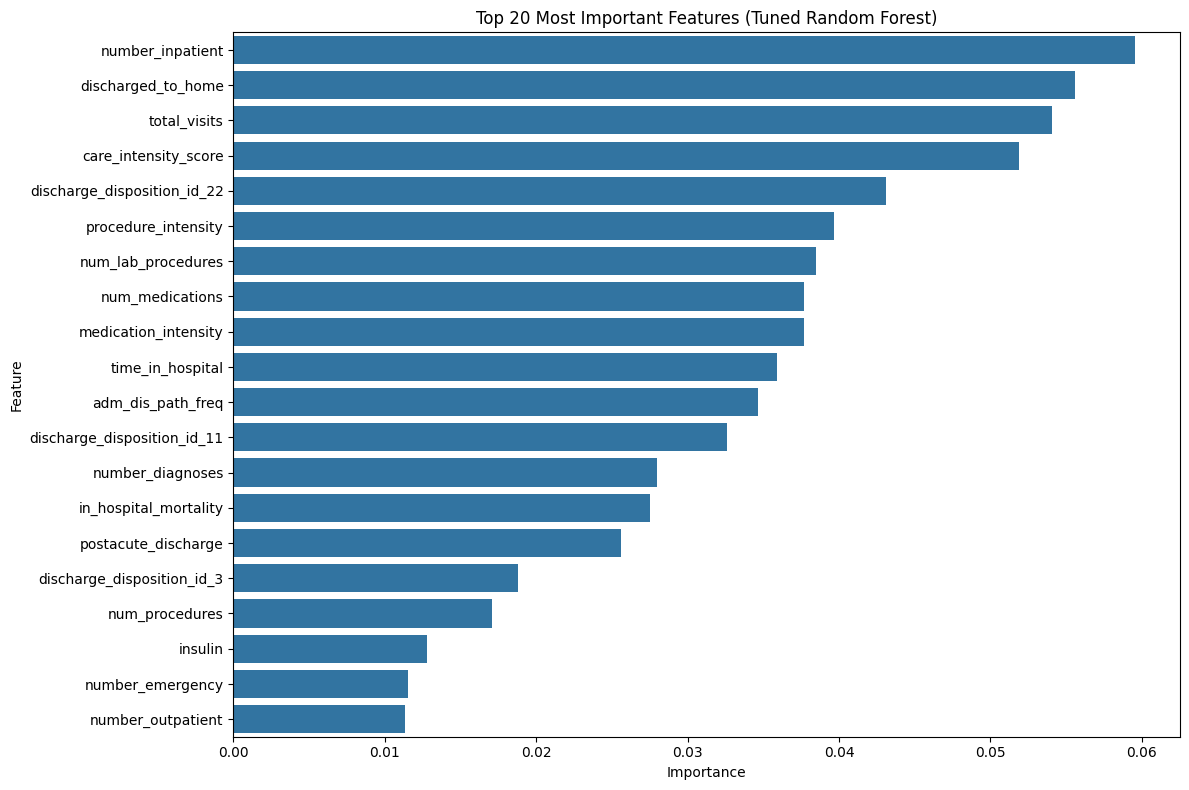

In [55]:
# Define a smaller set of parameters to search over to save time
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1') # scoring='f1' focuses on the minority class

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("--- Tuned Random Forest ---")
print(classification_report(y_test, y_pred_best_rf))

# Get the best Random Forest model from the grid search
best_rf = grid_search.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Feature ReSelection for Random Forest

#### Identify Top Features

Feature importance plot saved as feature_importance.png


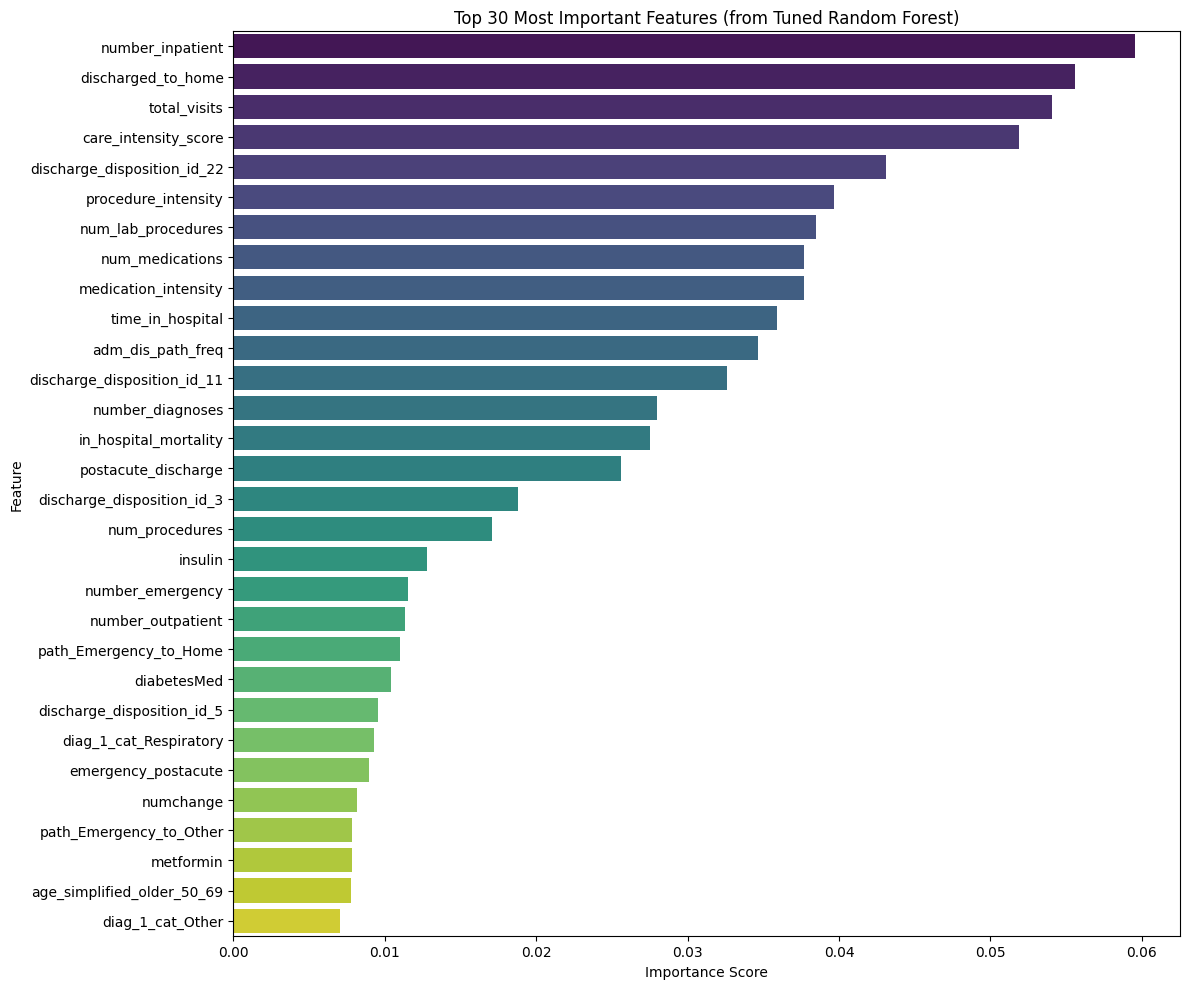

In [56]:
# Ensure 'grid_search' variable holds your fitted RandomForest GridSearchCV object
best_rf = grid_search.best_estimator_

# Get feature importances and names
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# --- Plot the top features ---
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(30), palette='viridis')
plt.title('Top 30 Most Important Features (from Tuned Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved as feature_importance.png")

#### Retrain Model on Selected Features

In [57]:
# --- Select the top N features ---
N_FEATURES = 30
top_features = feature_importance_df['feature'].head(N_FEATURES).tolist()

print(f"\n--- Selected Top {N_FEATURES} Features ---")
print(top_features)

# Create new training and testing sets with only the top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# --- Retrain the model on the smaller feature set ---
# You can use the same best parameters you found before
rf_selected_features = RandomForestClassifier(n_estimators=150,
                                              max_depth=10,
                                              min_samples_leaf=1,
                                              class_weight='balanced',
                                              random_state=42,
                                              n_jobs=-1)

print("\n--- Retraining Random Forest on Selected Features ---")
rf_selected_features.fit(X_train_selected, y_train)

# Evaluate the new model
y_pred_selected = rf_selected_features.predict(X_test_selected)

print("\n--- Classification Report (Model with Top Features Only) ---")
print(classification_report(y_test, y_pred_selected))


--- Selected Top 30 Features ---
['number_inpatient', 'discharged_to_home', 'total_visits', 'care_intensity_score', 'discharge_disposition_id_22', 'procedure_intensity', 'num_lab_procedures', 'num_medications', 'medication_intensity', 'time_in_hospital', 'adm_dis_path_freq', 'discharge_disposition_id_11', 'number_diagnoses', 'in_hospital_mortality', 'postacute_discharge', 'discharge_disposition_id_3', 'num_procedures', 'insulin', 'number_emergency', 'number_outpatient', 'path_Emergency_to_Home', 'diabetesMed', 'discharge_disposition_id_5', 'diag_1_cat_Respiratory', 'emergency_postacute', 'numchange', 'path_Emergency_to_Other', 'metformin', 'age_simplified_older_50_69', 'diag_1_cat_Other']

--- Retraining Random Forest on Selected Features ---

--- Classification Report (Model with Top Features Only) ---
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     13044
           1       0.14      0.47      0.22      1259

    accuracy        

## XGBoost

In [58]:
# We need the scale_pos_weight value you calculated before
count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
scale_pos_weight = count_neg / count_pos

# Define a parameter grid to search
# NOTE: This is a small grid to save time. Adjust these parameter accordingly
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 1.0]
}

# Create the XGBoost classifier, including the scale_pos_weight
xgb_clf = xgb.XGBClassifier(eval_metric='logloss',
                            scale_pos_weight=scale_pos_weight,
                            use_label_encoder=False,
                            random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf,
                               param_grid=param_grid_xgb,
                               cv=3,
                               n_jobs=-1,
                               verbose=2,
                               scoring='f1') # Optimize for f1-score of the positive class

# Fit the grid search to the data
print("--- Starting XGBoost Hyperparameter Tuning ---")
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found
print(f"Best XGBoost parameters found: {grid_search_xgb.best_params_}")

# Evaluate the best model on the test set
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("\n--- Tuned XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_best_xgb))

--- Starting XGBoost Hyperparameter Tuning ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=5, n_es

## Logistic Regression

In [59]:
# We continue to use class_weight='balanced' to handle the imbalanced dataset
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000, random_state=42)

# Define the parameter grid to search
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100] # Range of values for regularization strength
}

# Set up GridSearchCV to optimize for f1-score
grid_search_lr = GridSearchCV(estimator=log_reg,
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=1)

print("--- Starting Logistic Regression Hyperparameter Tuning ---")
grid_search_lr.fit(X_train, y_train)

# Print best parameters
print(f"Best Logistic Regression parameters: {grid_search_lr.best_params_}")

# Evaluate the best model
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)

print("\n--- Tuned Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_best_lr))

--- Starting Logistic Regression Hyperparameter Tuning ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Logistic Regression parameters: {'C': 0.1, 'penalty': 'l1'}

--- Tuned Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     13044
           1       0.14      0.55      0.23      1259

    accuracy                           0.67     14303
   macro avg       0.54      0.62      0.51     14303
weighted avg       0.87      0.67      0.74     14303



## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

# Create the pipeline
smote_pipeline_nb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

# Define the parameter grid for var_smoothing
# These are standard values to test for this parameter
param_grid_nb = {
    'classifier__var_smoothing': np.logspace(0, -9, num=100)
}

# Set up GridSearchCV
grid_search_nb = GridSearchCV(estimator=smote_pipeline_nb,
                              param_grid=param_grid_nb,
                              cv=5,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=1)

print("--- Starting Naive Bayes Hyperparameter Tuning ---")
grid_search_nb.fit(X_train, y_train)

# Print best parameters
print(f"Best Naive Bayes parameters: {grid_search_nb.best_params_}")

# Evaluate the best model
best_nb = grid_search_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)

print("\n--- Tuned Naive Bayes Classification Report ---")
print(classification_report(y_test, y_pred_best_nb))

--- Starting Naive Bayes Hyperparameter Tuning ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Naive Bayes parameters: {'classifier__var_smoothing': np.float64(0.2848035868435802)}

--- Tuned Naive Bayes Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.07      0.14     13044
           1       0.09      0.96      0.17      1259

    accuracy                           0.15     14303
   macro avg       0.52      0.52      0.15     14303
weighted avg       0.88      0.15      0.14     14303



# Iteration 4

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Data Loading and Preprocessing

In [62]:
diabetes_df = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv", low_memory=False)


# MISSING VALUE HANDLING
## Drop columns with high missing values
cols_to_drop = ['weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty']
diabetes_df.drop(columns=cols_to_drop, inplace=True)

## Fill missing race with 'Other'
diabetes_df['race'] = diabetes_df['race'].fillna('Other')

## Drop columns with single value
cols_with_one_value = ['examide', 'citoglipton']
diabetes_df.drop(columns=cols_with_one_value, inplace=True)

## Remove 'Unknown/Invalid' gender
diabetes_df = diabetes_df[diabetes_df['gender'] != 'Unknown/Invalid']

## Keep only first visit for each patient
diabetes_df = diabetes_df.drop_duplicates(['patient_nbr'], keep='first')

## Drop ID columns
id_cols = ['encounter_id', 'patient_nbr']
diabetes_df.drop(columns=id_cols, inplace=True)

## Feature Engineering

In [63]:
## NEW FEATURE GENERATION
def simplify_age_group(age_str):
    if pd.isna(age_str):
        return "Unknown"
    age_num = int(age_str.split('-')[0].replace('[', ''))
    if age_num < 30:
        return "young_less_than_30"
    elif age_num < 50:
        return "middle_30_49"
    elif age_num < 70:
        return "older_50_69"
    else:
        return "elderly_more_than_70"

diabetes_df["age_simplified"] = diabetes_df["age"].apply(simplify_age_group)
diabetes_df["age_simplified"].describe().T

## re-encoding admission type, discharge type and admission source into fewer categories
## admission_type_id 1 = emergency, 2 = urgent, 3 = elective, 4 = newborn, 5 = not available, 6 = NULL, 7 = trauma center, 8 = Not Mapped
## 1, 2 and 7 can be grouped as emergency
## 5, 6 and 8 can be grouped as not available
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(2,1)
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(7,1)
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(6,5)
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace(8,5)

## discharge_disposition_id grouped into:
## 1 = discharged to home 
## 2 = discharged/transferred to another healthcare facility
## 10 = discharged/transferred to another type of facility
## 18 = unknown
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(6,1)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(8,1)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(9,1)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(13,1)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(3,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(4,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(5,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(14,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(22,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(23,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(24,2)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(12,10)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(15,10)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(16,10)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(17,10)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(25,18)
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace(26,18)

## admission_source_id grouped into:
## 1 = from physician referral and clinic referral
## 4 = from transfer from a healthcare facility
## 9 = unknown
# 11 = newborn or sick babies
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(2,1)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(3,1)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(5,4)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(6,4)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(10,4)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(22,4)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(25,4)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(15,9)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(17,9)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(20,9)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(21,9)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(12,11)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(13,11)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(14,11)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(23,11)
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace(24,11)

## count records of patients who discharged to hospice, died during the hospital stay or after transfer to another facility
records_of_expired_patients = diabetes_df[diabetes_df['discharge_disposition_id'].isin([11, 19, 20, 21])].shape[0]
print("removing", records_of_expired_patients, "records of patients who discharged to hospice, died during the hospital stay or after transfer to another facility to reduce bias")
diabetes_df = diabetes_df[~diabetes_df['discharge_disposition_id'].isin([11, 19, 20, 21])]
diabetes_df.shape

def categorize_diagnosis(diag_code):
    if pd.isna(diag_code):
        return 'Unknown'
    diag_str = str(diag_code)
    if diag_str.startswith('V') or diag_str.startswith('E'):
        return 'Other'
    try:
        diag_num = float(diag_str)
    except:
        return 'Other'
    if 390 <= diag_num <= 459 or diag_num == 785:
        return 'Circulatory'
    elif 460 <= diag_num <= 519 or diag_num == 786:
        return 'Respiratory'
    elif 520 <= diag_num <= 579 or diag_num == 787:
        return 'Digestive'
    elif 250 <= diag_num < 251:
        return 'Diabetes'
    elif 800 <= diag_num <= 999:
        return 'Injury'
    elif 710 <= diag_num <= 739:
        return 'Musculoskeletal'
    elif 580 <= diag_num <= 629 or diag_num == 788:
        return 'Genitourinary'
    elif 140 <= diag_num <= 239:
        return 'Neoplasms'
    else:
        return 'Other'

diabetes_df['diag_1_cat'] = diabetes_df['diag_1'].apply(categorize_diagnosis)
diabetes_df['diag_2_cat'] = diabetes_df['diag_2'].apply(categorize_diagnosis)
diabetes_df['diag_3_cat'] = diabetes_df['diag_3'].apply(categorize_diagnosis)
diabetes_df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

diabetes_df['total_visits'] = diabetes_df['number_outpatient'] + diabetes_df['number_inpatient'] + diabetes_df['number_emergency']
diabetes_df['procedure_intensity'] = diabetes_df['num_lab_procedures'] + diabetes_df['num_procedures']
denom = diabetes_df['number_diagnoses'].replace(0, np.nan)
diabetes_df['medication_intensity'] = (diabetes_df['num_medications'] / denom).fillna(0)

diabetes_df['care_intensity_score'] = (
    diabetes_df['num_medications'] * 0.3 +
    diabetes_df['num_procedures'] * 0.3 +
    diabetes_df['num_lab_procedures'] * 0.2 +
    diabetes_df['number_diagnoses'] * 0.2
)

drug_keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in drug_keys:
    diabetes_df[col + 'temp'] = diabetes_df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabetes_df['numchange'] = 0
for col in drug_keys:
    diabetes_df['numchange'] = diabetes_df['numchange'] + diabetes_df[col + 'temp']
    del diabetes_df[col + 'temp']
    
## admission-dishcarge path
for c in ['admission_type_id','discharge_disposition_id']:
    if c in diabetes_df.columns: diabetes_df[c] = pd.to_numeric(diabetes_df[c], errors='coerce')

adm_map = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',7:'Trauma'}
diabetes_df['admission_cat'] = diabetes_df['admission_type_id'].map(adm_map).fillna('Other')

home_set={1}; transfer_set={2}; postacute_set={3,4,5,6}; ama_set={7}; death_set={11,19,20,21}; hospice_set={50,51}
def discharge_bucket(x):
    if pd.isna(x): return 'Unknown'
    x=int(x)
    if x in home_set: return 'Home'
    if x in postacute_set: return 'PostAcute'
    if x in transfer_set: return 'Transfer'
    if x in ama_set: return 'AMA'
    if x in death_set: return 'Died'
    if x in hospice_set: return 'Hospice'
    return 'Other'

diabetes_df['discharge_cat'] = diabetes_df['discharge_disposition_id'].apply(discharge_bucket)

diabetes_df['discharged_to_home'] = (diabetes_df['discharge_cat']=='Home').astype(int)
diabetes_df['postacute_discharge'] = (diabetes_df['discharge_cat']=='PostAcute').astype(int)
diabetes_df['transfer_discharge'] = (diabetes_df['discharge_cat']=='Transfer').astype(int)
diabetes_df['left_against_medical'] = (diabetes_df['discharge_cat']=='AMA').astype(int)
diabetes_df['in_hospital_mortality'] = (diabetes_df['discharge_cat']=='Died').astype(int)
diabetes_df['hospice_discharge'] = (diabetes_df['discharge_cat']=='Hospice').astype(int)

diabetes_df['adm_dis_path'] = diabetes_df['admission_cat'].str.cat(diabetes_df['discharge_cat'], sep='→')
path_freq = diabetes_df['adm_dis_path'].value_counts()
diabetes_df['adm_dis_path_freq'] = diabetes_df['adm_dis_path'].map(path_freq)

K = 10
topK_paths = path_freq.index[:K]
for p in topK_paths:
    diabetes_df['path_' + p.replace('→','_to_')] = (diabetes_df['adm_dis_path']==p).astype(int)

diabetes_df['emergency_postacute'] = ((diabetes_df['admission_cat']=='Emergency') & (diabetes_df['postacute_discharge']==1)).astype(int)
diabetes_df['elective_home']       = ((diabetes_df['admission_cat']=='Elective') & (diabetes_df['discharged_to_home']==1)).astype(int)

removing 1084 records of patients who discharged to hospice, died during the hospital stay or after transfer to another facility to reduce bias


## Encoding

In [64]:
diagnosis_labels = {
  'Circulatory': 0,
  'Respiratory': 1,
  'Digestive': 2,
  'Diabetes': 3,
  'Injury': 4,
  'Musculoskeletal': 5,
  'Genitourinary': 6,
  'Neoplasms': 7,
  'Other': 8,
  'Unknown': 9
}
for col in ['diag_1_cat', 'diag_2_cat', 'diag_3_cat']:
    diabetes_df[col] = diabetes_df[col].map(diagnosis_labels)
    print(diabetes_df[col].unique())

# Target variable
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('>30', 0)
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('<30', 1)
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace('NO', 0)

# Encoding
drug_labels = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
for col in drug_keys:
    diabetes_df[col] = diabetes_df[col].map(drug_labels)

diabetes_df['change'] = diabetes_df['change'].replace({'No': 0, 'Ch': 1})
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].replace({'No': 0, 'Yes': 1})

[3 8 7 0 1 4 5 2 6 9]
[9 3 7 0 1 8 4 5 6 2]
[9 8 0 3 1 4 7 6 5 2]


In [65]:
# convert data type of nominal features in dataframe to 'object' type
categorical_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
        'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
        'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
        'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
        'age_simplified', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat']

diabetes_df[categorical_cols] = diabetes_df[categorical_cols].astype('object')


numeric_features = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = diabetes_df.select_dtypes(include=['object']).columns.tolist()

if 'readmitted' in numeric_features:
    numeric_features.remove('readmitted')

for col in categorical_features[:]:
    n_unique = diabetes_df[col].nunique()
    print(f"  - {col}: {n_unique} unique values")

  - race: 5 unique values
  - gender: 2 unique values
  - age: 10 unique values
  - admission_type_id: 4 unique values
  - discharge_disposition_id: 7 unique values
  - admission_source_id: 6 unique values
  - metformin: 4 unique values
  - repaglinide: 4 unique values
  - nateglinide: 4 unique values
  - chlorpropamide: 4 unique values
  - glimepiride: 4 unique values
  - acetohexamide: 2 unique values
  - glipizide: 4 unique values
  - glyburide: 4 unique values
  - tolbutamide: 2 unique values
  - pioglitazone: 4 unique values
  - rosiglitazone: 4 unique values
  - acarbose: 3 unique values
  - miglitol: 4 unique values
  - troglitazone: 2 unique values
  - tolazamide: 2 unique values
  - insulin: 4 unique values
  - glyburide-metformin: 4 unique values
  - glipizide-metformin: 2 unique values
  - glimepiride-pioglitazone: 1 unique values
  - metformin-rosiglitazone: 2 unique values
  - metformin-pioglitazone: 2 unique values
  - change: 2 unique values
  - diabetesMed: 2 unique val

In [66]:
# get list of only numeric features
print(numeric_features)

# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = numeric_features
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in numeric_features:
    skewval = diabetes_df[i].skew()
    skew_before.append(skewval)
    
    kurtval = diabetes_df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = diabetes_df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(diabetes_df[diabetes_df[i] == 0])/len(diabetes_df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(diabetes_df[diabetes_df[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(diabetes_df[diabetes_df[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(diabetes_df[diabetes_df[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(diabetes_df[diabetes_df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'total_visits', 'procedure_intensity', 'medication_intensity', 'care_intensity_score', 'numchange', 'discharged_to_home', 'postacute_discharge', 'transfer_discharge', 'left_against_medical', 'in_hospital_mortality', 'hospice_discharge', 'adm_dis_path_freq', 'path_Emergency_to_Home', 'path_Elective_to_Home', 'path_Emergency_to_Transfer', 'path_Other_to_Home', 'path_Elective_to_Transfer', 'path_Emergency_to_Other', 'path_Other_to_Transfer', 'path_Other_to_Other', 'path_Elective_to_Other', 'path_Emergency_to_AMA', 'emergency_postacute', 'elective_home']


In [67]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            diabetes_df = diabetes_df[diabetes_df[colname] > 0]
            diabetes_df[colname + "_log"] = np.log(diabetes_df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            diabetes_df = diabetes_df[diabetes_df[colname] >= 0]
            diabetes_df[colname + "_log1p"] = np.log1p(diabetes_df[colname])

In [68]:
diabetes_df = diabetes_df.drop(['number_outpatient','number_emergency','number_inpatient','total_visits','medication_intensity'], axis = 1)
diabetes_df.shape

(70431, 78)

## Modeling

In [69]:
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [70]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__subsample': [0.7, 1.0]
    },
    'LightGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__num_leaves': [31, 50]
    }
}

# Define samplers
samplers = {
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

results = {}

# Loop through models and samplers
for model_name, model in models.items():
    results[model_name] = {}
    for sampler_name, sampler in samplers.items():
        print(f'Running {model_name} with {sampler_name}...')
        
        # Create pipeline
        pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                      ('sampler', sampler),
                                      ('classifier', model)])
        
        # Create GridSearchCV
        cv = StratifiedKFold(n_splits=3)
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=cv, scoring='f1', n_jobs=-1, verbose=2)
        
        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)
        
        # Store results
        results[model_name][sampler_name] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'best_estimator': grid_search.best_estimator_
        }
        
        print(f'Best F1-score for {model_name} with {sampler_name}: {grid_search.best_score_:.4f}')
        print(f'Best parameters: {grid_search.best_params_}')
        print('-'*50)

# Print final results
for model_name, model_results in results.items():
    for sampler_name, sampler_results in model_results.items():
        print(f'{model_name} with {sampler_name}:')
        print(f"  Best F1-score: {sampler_results['best_score']:.4f}")
        print(f"  Best params: {sampler_results['best_params']}")


Running Logistic Regression with SMOTE...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time=   2.2s
[CV] END .........classifier__C=0.01, classifier__penalty=l2; total time=   2.6s
[CV] END .........classifier__C=0.01, classifier__penalty=l2; total time=   2.6s
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time=   2.9s
[CV] END .........classifier__C=0.01, classifier__penalty=l2; total time=   2.8s
[CV] END .........classifier__C=0.01, classifier__penalty=l1; total time=   3.2s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   4.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   3.8s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   6.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   4.5s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   8.8s
[CV] EN

In [71]:
# A list to store the results
results_summary = []

# Loop through each model and sampler combination
for model_name, model_samplers in results.items():
    for sampler_name, model_data in model_samplers.items():
        # Get the best estimator
        best_estimator = model_data['best_estimator']
        
        # Make predictions on the test set
        y_pred = best_estimator.predict(X_test)
        
        # Generate the classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract the desired metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        # Metrics for class 0
        if '0' in report:
            precision_class_0 = report['0']['precision']
            recall_class_0 = report['0']['recall']
            f1_class_0 = report['0']['f1-score']
        else:
            precision_class_0 = 0
            recall_class_0 = 0
            f1_class_0 = 0

        # Metrics for class 1
        if '1' in report:
            precision_class_1 = report['1']['precision']
            recall_class_1 = report['1']['recall']
            f1_class_1 = report['1']['f1-score']
        else:
            precision_class_1 = 0
            recall_class_1 = 0
            f1_class_1 = 0

        # Macro and weighted averages for f1-score
        macro_f1 = report['macro avg']['f1-score']
        weighted_f1 = report['weighted avg']['f1-score']
        
        # Append the results to the list
        results_summary.append({
            'Model': f'{model_name} ({sampler_name})',
            'Accuracy': f'{accuracy:.4f}',
            'Precision (Class 0)': f'{precision_class_0:.4f}',
            'Recall (Class 0)': f'{recall_class_0:.4f}',
            'F1-score (Class 0)': f'{f1_class_0:.4f}',
            'Precision (Class 1)': f'{precision_class_1:.4f}',
            'Recall (Class 1)': f'{recall_class_1:.4f}',
            'F1-score (Class 1)': f'{f1_class_1:.4f}',
            'Macro Avg F1': f'{macro_f1:.4f}',
            'Weighted Avg F1': f'{weighted_f1:.4f}'
        })

# Create a DataFrame from the results
summary_df = pd.DataFrame(results_summary)

# Display the summary table in markdown format
print("## Model Performance Summary")
print(summary_df.to_markdown(index=False))

## Model Performance Summary
| Model                          |   Accuracy |   Precision (Class 0) |   Recall (Class 0) |   F1-score (Class 0) |   Precision (Class 1) |   Recall (Class 1) |   F1-score (Class 1) |   Macro Avg F1 |   Weighted Avg F1 |
|:-------------------------------|-----------:|----------------------:|-------------------:|---------------------:|----------------------:|-------------------:|---------------------:|---------------:|------------------:|
| Logistic Regression (SMOTE)    |     0.642  |                0.9376 |             0.6501 |               0.7678 |                0.1356 |             0.5592 |               0.2183 |         0.4931 |            0.7187 |
| Logistic Regression (SMOTEENN) |     0.3106 |                0.9532 |             0.2555 |               0.403  |                0.1031 |             0.8721 |               0.1844 |         0.2937 |            0.3835 |
| Random Forest (SMOTE)          |     0.8922 |                0.9131 |             0.9

In [72]:
# If you haven't installed plotly yet, you can do so by running: !pip install plotly
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import plotly.express as px

# --- Create a summary of model performance to identify the top 3 ---
results_summary = []
for model_name, model_samplers in results.items():
    for sampler_name, model_data in model_samplers.items():
        best_estimator = model_data['best_estimator']
        y_pred = best_estimator.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Safely get the F1-score for class 1
        f1_class_1 = report.get('1', {}).get('f1-score', 0)
        
        results_summary.append({
            'ModelName': model_name,
            'SamplerName': sampler_name,
            'F1-score (Class 1)': f1_class_1
        })

summary_df = pd.DataFrame(results_summary)

# Get the top 3 models
top_3_models = summary_df.sort_values(by='F1-score (Class 1)', ascending=False).head(3)

print("Plotting confusion matrices for the top 3 models based on F1-score for Class 1:")
print(top_3_models)

# --- Loop through the top 3 models and plot their confusion matrices ---
for index, row in top_3_models.iterrows():
    model_name = row['ModelName']
    sampler_name = row['SamplerName']
    
    # Get the best estimator from the results dictionary
    best_estimator = results[model_name][sampler_name]['best_estimator']
    
    # Make predictions
    y_pred = best_estimator.predict(X_test)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the plot with Plotly Express
    fig = px.imshow(cm,
                    labels=dict(x="Predicted Label", y="True Label", color="Count"),
                    x=['Not Readmitted (0)', 'Readmitted (1)'],
                    y=['Not Readmitted (0)', 'Readmitted (1)'],
                    text_auto=True,  # Automatically display the values on theheatmap
                    color_continuous_scale='Blues',
                    title=f'Confusion Matrix for {model_name} ({sampler_name})'
                   )
    
    fig.update_layout(title_x=0.5) # Center the title
    fig.show()

Plotting confusion matrices for the top 3 models based on F1-score for Class 1:
             ModelName SamplerName  F1-score (Class 1)
3        Random Forest    SMOTEENN            0.218496
0  Logistic Regression       SMOTE            0.218261
5              XGBoost    SMOTEENN            0.210432


# Iteration 5

In [73]:
# 1. Data Loading and Preprocessing (from Iteration 4)
diabetes_df = pd.read_csv("https://archive.ics.uci.edu/static/public/296/data.csv", low_memory=False)

cols_to_drop = ['weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty']
diabetes_df.drop(columns=cols_to_drop, inplace=True)
diabetes_df['race'] = diabetes_df['race'].fillna('Other')
cols_with_one_value = ['examide', 'citoglipton']
diabetes_df.drop(columns=cols_with_one_value, inplace=True)
diabetes_df = diabetes_df[diabetes_df['gender'] != 'Unknown/Invalid']
diabetes_df = diabetes_df.drop_duplicates(['patient_nbr'], keep='first')
id_cols = ['encounter_id', 'patient_nbr']
diabetes_df.drop(columns=id_cols, inplace=True)
def simplify_age_group(age_str):
    if pd.isna(age_str):
        return "Unknown"
    age_num = int(age_str.split('-')[0].replace('[', ''))
    if age_num < 30:
        return "young_less_than_30"
    elif age_num < 50:
        return "middle_30_49"
    elif age_num < 70:
        return "older_50_69"
    else:
        return "elderly_more_than_70"
diabetes_df["age_simplified"] = diabetes_df["age"].apply(simplify_age_group)
diabetes_df["age_simplified"].describe().T
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].replace({2:1, 7:1, 6:5, 8:5})
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].replace({6:1, 8:1, 9:1, 13:1, 3:2, 4:2, 5:2, 14:2, 22:2, 23:2, 24:2, 12:10, 15:10, 16:10, 17:10, 25:18, 26:18})
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].replace({2:1, 3:1, 5:4, 6:4, 10:4, 22:4, 25:4, 15:9, 17:9, 20:9, 21:9, 12:11, 13:11, 14:11, 23:11, 24:11})
diabetes_df = diabetes_df[~diabetes_df['discharge_disposition_id'].isin([11, 19, 20, 21])]

def categorize_diagnosis(diag_code):
    if pd.isna(diag_code): return 'Unknown'
    diag_str = str(diag_code)
    if diag_str.startswith('V') or diag_str.startswith('E'): return 'Other'
    try: diag_num = float(diag_str)
    except: return 'Other'
    if 390 <= diag_num <= 459 or diag_num == 785: return 'Circulatory'
    elif 460 <= diag_num <= 519 or diag_num == 786: return 'Respiratory'
    elif 520 <= diag_num <= 579 or diag_num == 787: return 'Digestive'
    elif 250 <= diag_num < 251: return 'Diabetes'
    elif 800 <= diag_num <= 999: return 'Injury'
    elif 710 <= diag_num <= 739: return 'Musculoskeletal'
    elif 580 <= diag_num <= 629 or diag_num == 788: return 'Genitourinary'
    elif 140 <= diag_num <= 239: return 'Neoplasms'
    else: return 'Other'

diabetes_df['diag_1_cat'] = diabetes_df['diag_1'].apply(categorize_diagnosis)
diabetes_df['diag_2_cat'] = diabetes_df['diag_2'].apply(categorize_diagnosis)
diabetes_df['diag_3_cat'] = diabetes_df['diag_3'].apply(categorize_diagnosis)
diabetes_df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)
diabetes_df['total_visits'] = diabetes_df['number_outpatient'] + diabetes_df['number_inpatient']+ diabetes_df['number_emergency']
diabetes_df['procedure_intensity'] = diabetes_df['num_lab_procedures'] + diabetes_df['num_procedures']
denom = diabetes_df['number_diagnoses'].replace(0, np.nan)
diabetes_df['medication_intensity'] = (diabetes_df['num_medications'] / denom).fillna(0)

diabetes_df['care_intensity_score'] = (
    diabetes_df['num_medications'] * 0.3 +
    diabetes_df['num_procedures'] * 0.3 +
    diabetes_df['num_lab_procedures'] * 0.2 +
    diabetes_df['number_diagnoses'] * 0.2
)

drug_keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
diabetes_df['medication_count'] = diabetes_df[drug_keys].apply(lambda x: (x != 'No').sum(), axis=1)
for col in drug_keys:
    diabetes_df[col + 'temp'] = diabetes_df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
diabetes_df['numchange'] = 0
for col in drug_keys:
    diabetes_df['numchange'] = diabetes_df['numchange'] + diabetes_df[col + 'temp']
    del diabetes_df[col + 'temp']


## admission-dishcarge path
for c in ['admission_type_id','discharge_disposition_id']:
    if c in diabetes_df.columns: diabetes_df[c] = pd.to_numeric(diabetes_df[c], errors='coerce')

adm_map = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',7:'Trauma'}
diabetes_df['admission_cat'] = diabetes_df['admission_type_id'].map(adm_map).fillna('Other')

home_set={1}; transfer_set={2}; postacute_set={3,4,5,6}; ama_set={7}; death_set={11,19,20,21}; hospice_set={50,51}
def discharge_bucket(x):
    if pd.isna(x): return 'Unknown'
    x=int(x)
    if x in home_set: return 'Home'
    if x in postacute_set: return 'PostAcute'
    if x in transfer_set: return 'Transfer'
    if x in ama_set: return 'AMA'
    if x in death_set: return 'Died'
    if x in hospice_set: return 'Hospice'
    return 'Other'

diabetes_df['discharge_cat'] = diabetes_df['discharge_disposition_id'].apply(discharge_bucket)

diabetes_df['discharged_to_home'] = (diabetes_df['discharge_cat']=='Home').astype(int)
diabetes_df['postacute_discharge'] = (diabetes_df['discharge_cat']=='PostAcute').astype(int)
diabetes_df['transfer_discharge'] = (diabetes_df['discharge_cat']=='Transfer').astype(int)
diabetes_df['left_against_medical'] = (diabetes_df['discharge_cat']=='AMA').astype(int)
diabetes_df['in_hospital_mortality'] = (diabetes_df['discharge_cat']=='Died').astype(int)
diabetes_df['hospice_discharge'] = (diabetes_df['discharge_cat']=='Hospice').astype(int)

diabetes_df['adm_dis_path'] = diabetes_df['admission_cat'].str.cat(diabetes_df['discharge_cat'], sep='→')
path_freq = diabetes_df['adm_dis_path'].value_counts()
diabetes_df['adm_dis_path_freq'] = diabetes_df['adm_dis_path'].map(path_freq)

K = 10
topK_paths = path_freq.index[:K]
for p in topK_paths:
    diabetes_df['path_' + p.replace('→','_to_')] = (diabetes_df['adm_dis_path']==p).astype(int)

diabetes_df['emergency_postacute'] = ((diabetes_df['admission_cat']=='Emergency') & (diabetes_df['postacute_discharge']==1)).astype(int)
diabetes_df['elective_home']       = ((diabetes_df['admission_cat']=='Elective') & (diabetes_df['discharged_to_home']==1)).astype(int)


### NEW FEATURES IN ITERATION 5
# Create a mapping for the simplified age groups to a numeric scale
age_mapping = {
    "young_less_than_30": 1,
    "middle_30_49": 2,
    "older_50_69": 3,
    "elderly_more_than_70": 4,
    "Unknown": 0  # Assigning 0 to unknown or you can choose to use another value
}
# Apply the mapping to create a new numeric age column
diabetes_df['age_simplified_numeric'] = diabetes_df['age_simplified'].map(age_mapping)
diabetes_df['age_diag_interaction'] = diabetes_df['age_simplified_numeric'] * diabetes_df['number_diagnoses']
diabetes_df['time_x_procedures'] = diabetes_df['time_in_hospital'] * diabetes_df['procedure_intensity']


for col in ['diag_1_cat', 'diag_2_cat', 'diag_3_cat']:
    diabetes_df[col] = diabetes_df[col].map(diagnosis_labels)
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace({'>30': 0, '<30': 1, 'NO': 0})
drug_labels = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
for col in drug_keys:
    diabetes_df[col] = diabetes_df[col].map(drug_labels)
diabetes_df['change'] = diabetes_df['change'].replace({'No': 0, 'Ch': 1})
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].replace({'No': 0, 'Yes': 1})

categorical_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'age_simplified', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat']
diabetes_df[categorical_cols] = diabetes_df[categorical_cols].astype('object')

In [74]:
# Log transform
numeric_features_original = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'readmitted' in numeric_features_original: numeric_features_original.remove('readmitted')
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = numeric_features_original
log_transform_cols = []
for i in numeric_features_original:
    skewval = diabetes_df[i].skew()
    kurtval = diabetes_df[i].kurtosis()
    if (abs(skewval) > 2) and (abs(kurtval) > 2):
        log_transform_cols.append(i)
        
        if len(diabetes_df[diabetes_df[i] == 0]) / len(diabetes_df) <= 0.02:
            diabetes_df = diabetes_df[diabetes_df[i] > 0]
            diabetes_df[i + "_log"] = np.log(diabetes_df[i])
        else:
            diabetes_df = diabetes_df[diabetes_df[i] >= 0]
            diabetes_df[i + "_log1p"] = np.log1p(diabetes_df[i])
            
# Drop original columns that were transformed and other unnecessary columns
cols_to_drop_after_transform = ['number_outpatient','number_emergency','number_inpatient',
'total_visits','medication_intensity']
cols_to_drop_after_transform.extend([col for col in log_transform_cols if col in 
diabetes_df.columns])
diabetes_df = diabetes_df.drop(columns=cols_to_drop_after_transform, axis=1)

In [75]:
# 2. Modeling with Cost-Sensitive Learning
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Define preprocessor
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

In [76]:
# Define hyperparameter grids with cost-sensitive parameters
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__class_weight': ['balanced']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__class_weight': ['balanced', 'balanced_subsample']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__subsample': [0.7, 1.0],
        'classifier__scale_pos_weight': [scale_pos_weight]
    },
    'LightGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__num_leaves': [31, 50],
        'classifier__class_weight': ['balanced']
    }
}


results = {}

# Loop through models
for model_name, model in models.items():
		print(f'Running {model_name} with cost-sensitive learning...')
		
		# Create pipeline (no sampler)
		pipeline = Pipeline(steps=[('preprocessor', preprocessor),
																	('classifier', model)])
		
		cv = StratifiedKFold(n_splits=3)
		# We are scoring on F1 for the positive class (label '1')
		grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=cv, scoring='f1'
, n_jobs=-1, verbose=2)
		
		grid_search.fit(X_train, y_train)
		
		results[model_name] = {
				'best_score': grid_search.best_score_,
				'best_params': grid_search.best_params_,
				'best_estimator': grid_search.best_estimator_
		}
		
		print(f'Best F1-score for {model_name}: {grid_search.best_score_:.4f}')
		print(f'Best parameters: {grid_search.best_params_}')
		print('-'*50)

Running Logistic Regression with cost-sensitive learning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1; total time=   0.8s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1; total time=   0.9s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1; total time=   1.1s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2; total time=   1.3s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2; total time=   1.5s
[CV] END classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2; total time=   1.4s
[CV] END classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1; total time=   2.2s
[CV] END classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2; total time=   2.7s
[CV] END classifier__C=0.1

In [77]:
# 3. Results and Analysis
results_summary = []
for model_name, model_data in results.items():
		best_estimator = model_data['best_estimator']
		y_pred = best_estimator.predict(X_test)
		report = classification_report(y_test, y_pred, output_dict=True)
		accuracy = accuracy_score(y_test, y_pred)
		
		results_summary.append({
				'Model': model_name,
				'Accuracy': f"{accuracy:.4f}",
				'F1-score (Class 1)': f"{report['1']['f1-score']:.4f}",
				'Recall (Class 1)': f"{report['1']['recall']:.4f}",
				'Precision (Class 1)': f"{report['1']['precision']:.4f}",
				'F1-score (Class 0)': f"{report['0']['f1-score']:.4f}",
				'Recall (Class 0)': f"{report['0']['recall']:.4f}",
				'Precision (Class 0)': f"{report['0']['precision']:.4f}",
				'Macro Avg F1': f"{report['macro avg']['f1-score']:.4f}",
				'Weighted Avg F1': f"{report['weighted avg']['f1-score']:.4f}"
		})

summary_df = pd.DataFrame(results_summary)
print("\\n## Model Performance Summary (Cost-Sensitive Learning)")
print(summary_df.to_markdown(index=False))

\n## Model Performance Summary (Cost-Sensitive Learning)
| Model               |   Accuracy |   F1-score (Class 1) |   Recall (Class 1) |   Precision (Class 1) |   F1-score (Class 0) |   Recall (Class 0) |   Precision (Class 0) |   Macro Avg F1 |   Weighted Avg F1 |
|:--------------------|-----------:|---------------------:|-------------------:|----------------------:|---------------------:|-------------------:|----------------------:|---------------:|------------------:|
| Logistic Regression |     0.6714 |               0.225  |             0.5338 |                0.1426 |               0.7915 |             0.6849 |                0.9374 |         0.5083 |            0.7409 |
| Random Forest       |     0.7508 |               0.2353 |             0.4289 |                0.1621 |               0.8512 |             0.7824 |                0.9332 |         0.5432 |            0.7961 |
| XGBoost             |     0.6832 |               0.2314 |             0.5338 |                0.1478 

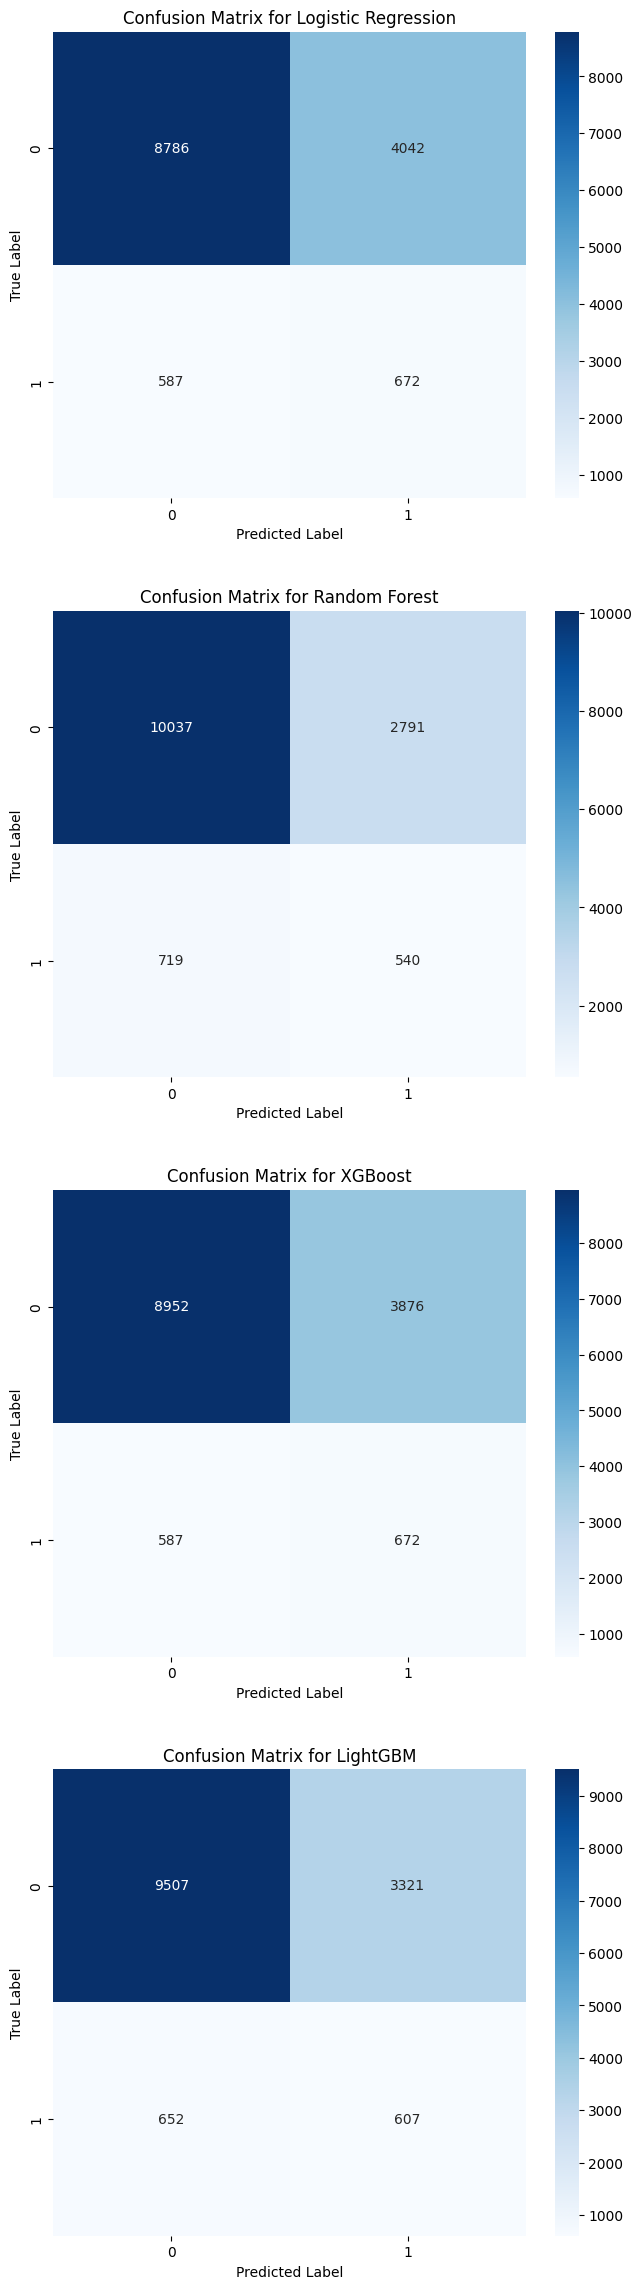

In [78]:
# Plot confusion matrices
num_models = len(results)
fig, axes = plt.subplots(num_models, 1, figsize=(8, num_models * 6))
if num_models == 1: axes = [axes] # Make it iterable if only one model
fig.tight_layout(pad=6.0)

for i, (model_name, model_data) in enumerate(results.items()):
		best_estimator = model_data['best_estimator']
		y_pred = best_estimator.predict(X_test)
		cm = confusion_matrix(y_test, y_pred)
		
		sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
		axes[i].set_title(f'Confusion Matrix for {model_name}')
		axes[i].set_xlabel('Predicted Label')
		axes[i].set_ylabel('True Label')

plt.show()

# Ensemble METHOD

### Creating and Evaluating an Ensemble Voting Classifier ###
\nTraining the Voting Classifier...
[LightGBM] [Info] Number of positive: 5034, number of negative: 51310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 56344, number of used features: 160
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training complete.
\nEvaluating the Voting Classifier...
\n## Ensemble Model Performance Summary
| Model             |   Accuracy |   Precision (0) |   Recall (0) |   F1-score (0) |   Precision (1) |   Recall (1) |   F1-score (1) |   Macro Avg F1 |   Weighted Avg F1 |
|:------------------|-----------:|----------------:|-------------:|----------

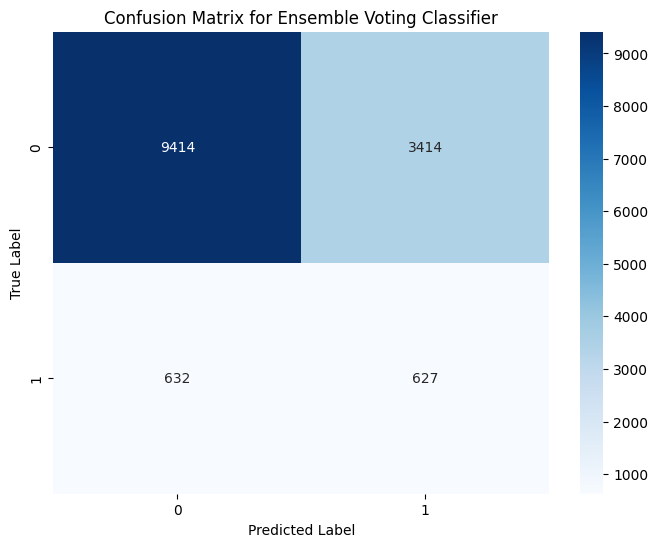

In [79]:
print("### Creating and Evaluating an Ensemble Voting Classifier ###")

# 1. Extract the best estimators from the previous cost-sensitive learning run
# This uses the 'results' dictionary you generated in the last step.
lr_best = results['Logistic Regression']['best_estimator']
rf_best = results['Random Forest']['best_estimator']
xgb_best = results['XGBoost']['best_estimator']
lgbm_best = results['LightGBM']['best_estimator']

# 2. Create the Voting Classifier
# We use 'soft' voting to average the predicted probabilities.
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_best),
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft'
)

# 3. Train the ensemble model on the full training data
print("\\nTraining the Voting Classifier...")
voting_clf.fit(X_train, y_train)
print("Training complete.")

# 4. Evaluate the ensemble model on the test set
print("\\nEvaluating the Voting Classifier...")
y_pred_ensemble = voting_clf.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred_ensemble, output_dict=True)
accuracy = accuracy_score(y_test, y_pred_ensemble)


# Create a summary DataFrame
ensemble_summary = {
    'Model': 'Voting Classifier',
    'Accuracy': f"{accuracy:.4f}",
    'Precision (0)': f"{report['0']['precision']:.4f}",
    'Recall (0)': f"{report['0']['recall']:.4f}",
    'F1-score (0)': f"{report['0']['f1-score']:.4f}",
    'Precision (1)': f"{report['1']['precision']:.4f}",
    'Recall (1)': f"{report['1']['recall']:.4f}",
    'F1-score (1)': f"{report['1']['f1-score']:.4f}",
    'Macro Avg F1': f"{report['macro avg']['f1-score']:.4f}",
    'Weighted Avg F1': f"{report['weighted avg']['f1-score']:.4f}"
}
summary_df = pd.DataFrame([ensemble_summary])

print("\\n## Ensemble Model Performance Summary")
print(summary_df.to_markdown(index=False))


# Plot the confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()